## IndianProducts on Amazon:- Analysis of reviews and insghits from same

India needs a boost to its economy that can also simultaneously transform local businesses. In order to support Indian brands, 'Vocal for Local' campaign was started in India. Emphasizing on a self-reliant, or ‘aatmanirbhar’, India, the Indian government has asked that products not just be made in India, but also for the promotion of local brands, manufacturing, and supply chain.

Data analysis on millions of reviews through Amazon is a crucial factor for the company. These reviews generates a lot of data -- data that can be analyzed and used for advertising, business decisions, understanding of customers' needs and wishes on the products (and platforms), guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset comprises of 2500+ reviews of about 100+ Indian Products pertaining to categories like hair and skin care products, clothes, electronic gadgets, etc from Amazon

### This notebook containes analysis of the data through which insights can be gained for better customer satisfaction. We will use sentiment analysis technique to find out the critical reviews and figure out keywords that can be useful for marketing companies  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv ("amazon_vfl_reviews.csv")

In [4]:
df.head(2)

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,06-09-2019,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,14-08-2019,5,Used This Mama Earth Newly Launched Onion Oil ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782 entries, 0 to 2781
Data columns (total 5 columns):
asin      2782 non-null object
name      2782 non-null object
date      2782 non-null object
rating    2782 non-null int64
review    2778 non-null object
dtypes: int64(1), object(4)
memory usage: 108.8+ KB


In [6]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [7]:
df[df.review.isna()]

,asin,name,date,rating,review
2248,B01GCETOCW,Tata-Tea-Gold-500g,03-03-2018,4,NaN
2258,B01GCETOCW,Tata-Tea-Gold-500g,03-03-2018,4,NaN
2631,B07J2MQNW3,Mysore-Sandal-Bathing-Soap-125g,22-05-2020,4,NaN
2641,B07J2MQNW3,Mysore-Sandal-Bathing-Soap-125g,22-05-2020,4,NaN


In [11]:
# the review column, four rows without review text, we drop the rows with the null columns
df = df.dropna()
#resetting the index
df = df.reset_index(drop=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 5 columns):
asin      2778 non-null object
name      2778 non-null object
date      2778 non-null object
rating    2778 non-null int64
review    2778 non-null object
dtypes: int64(1), object(4)
memory usage: 108.6+ KB


In [13]:
#identifying the different Indian brands selling on Amazon

In [14]:
import re 
df['brand'] = df['name'].str.split("-").str[0]

# to remove the difference between upper and lower cases we use title function to make all name in same format
df['brand'] = df['brand'].str.title() 

In [15]:
df.head()

,asin,name,date,rating,review,brand
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,06-09-2019,1,I bought this hair oil after viewing so many g...,Mamaearth
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,14-08-2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,19-10-2019,1,So bad product...My hair falling increase too ...,Mamaearth
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,16-09-2019,1,Product just smells similar to navarathna hair...,Mamaearth
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,18-08-2019,5,I have been trying different onion oil for my ...,Mamaearth


2778
['Mamaearth' 'Godrej' 'Titan' 'Maaza' 'Paper'] 
Here Number of unique brands =  24 With review counts of brand as below 


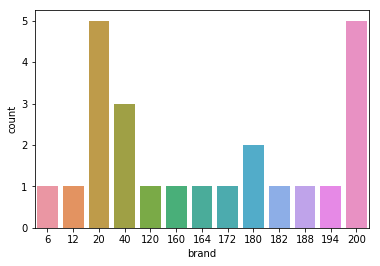

In [16]:
#getting the insights of the Brands ie. 
print(len(df.name))
b = df.brand.unique()
print(b[:5],"\nHere Number of unique brands = ",len(b),"With review counts of brand as below ")
m = df.brand.value_counts()
sns.countplot(m)

There are 5 brands with 200 reviews and only 14 brands have more than 100 reviews on their products   

In [17]:
#Cleaning the reviews by removing all the elements which are not a character or a number 

In [18]:
import re
def review_cleaner (input_text):
    cleaned_text = re.sub('[^A-Za-z0-9]+'," ",input_text)
    return (cleaned_text)

df['review'] = df['review'].apply(review_cleaner)

In [19]:
#example of a review after cleaning
df['review'][777]

'Seems to be a monopoly No competitor that s why charging so much But yes adds a reason to have a boaring food with ease'

In [20]:
#extracting the product name from name column
products = []
for value in df['name']:
    index = len(value.split('-')[0])
    products.append(value[index+1:])
df['product_name'] = products
u = df['product_name'].unique()
print(u[:5],"\n Here Number of unique products = ",len(u))

['Onion-Growth-Control-Redensyl' 'Percent-Natural-Berry-Toothpaste'
 'Natural-Turmeric-Saffron-brightning'
 'Illuminate-Vitamin-Radiant-Turmeric'
 'Blemishes-Pigmentation-Blemish-Mulberry'] 
 Here Number of unique products =  122


We have 24 unique brands with 122 Unique products in the data. 

In [21]:
#creating WORDCLOUD of all the reviews step by step
#STEP 1: Converting every word in review to string type 
#STEP 2: Tokenization to convert text into group of words
#STEP 3: Converting all the review tokens to lower case and joining all tokens to form a corpus for wordcloud

from wordcloud import WordCloud, STOPWORDS 
corpus = ''

stopwords = set(STOPWORDS)

for val in df.review:
    
    #typecast each value to string
    val = str(val)
    
    # split the value 
    tokens = val.split()
    
    #convert each token into lowercase
    
    for i in range (len(tokens)):
        tokens[i] = tokens[i].lower()
        
    corpus += " ".join(tokens)+" "


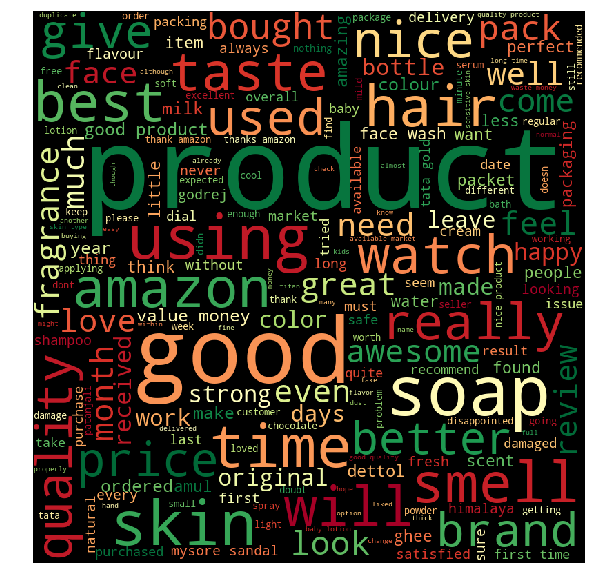

In [22]:
#Plotting wordcloud with the generated corpus in above step
wordcloud = WordCloud(width = 800, height = 800, 
                colormap ='RdYlGn', 
                stopwords = stopwords,max_words = 200,min_word_length = 4, 
                min_font_size = 10).generate(corpus) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

5    1444
1     546
4     460
3     198
2     130
Name: rating, dtype: int64

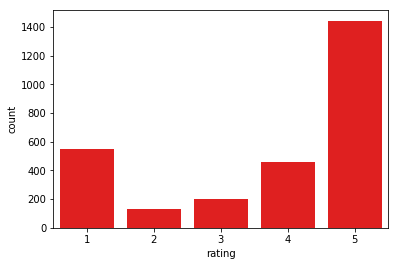

In [23]:
#sns.set_color_codes()
sns.countplot(df.rating,color='r')
df.rating.value_counts()

We can see that there are 1444 reviews with rating 5 ,and 546 reviews with rating 4 out of 2782 ratings. We 71% of the people trying indian product who have a good experience with the Indian brand products they purchased and 19.62% reviews are with rating 1

# Sentiment analysis using python library - TextBlob which is a lexicon based sentiment analyzer

For calculating sentiment, we will calculate polarity. It simply means emotions expressed in a sentence.

Polarity of a sentence lies between ( -1 to 1 ) -1 being Negative and 1 being Positive. A polarity of 0 means Neutral sentiment.

In [24]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords

def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score'] = df['review'].apply(lambda x : polarity(x))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity'] = df['polarity_score'].map(lambda x: sentiment(x))

['positive' 'negative' 'neutral']


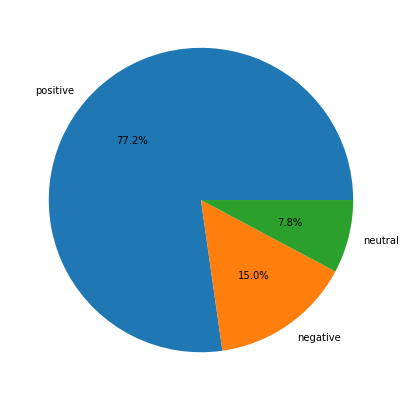

In [25]:
a = df['polarity'].unique()
print(a)
fig = plt.figure(figsize = (10,7))
plt.pie(df['polarity'].value_counts(),autopct='%1.1f%%',labels=a)
#%matplotlib inline
plt.show()

We can see that 77.1% review are positive, 7.9% reviews are neutral and 15% reviews are negative as per the sentiment analyzer 

We can also plot the wordcloud for critical reviews for further analysis

In [26]:
from wordcloud import WordCloud, STOPWORDS 
corpus_p = ''

stopwords = set(STOPWORDS)

for val in df.review[df.polarity=="negative"]:
    
    #typecast each value to string
    val = str(val)
    
    # split the value 
    tokens = val.split()
    
    #convert each token into lowercase
    
    for i in range (len(tokens)):
        tokens[i] = tokens[i].lower()
        
    corpus_p += " ".join(tokens)+" "


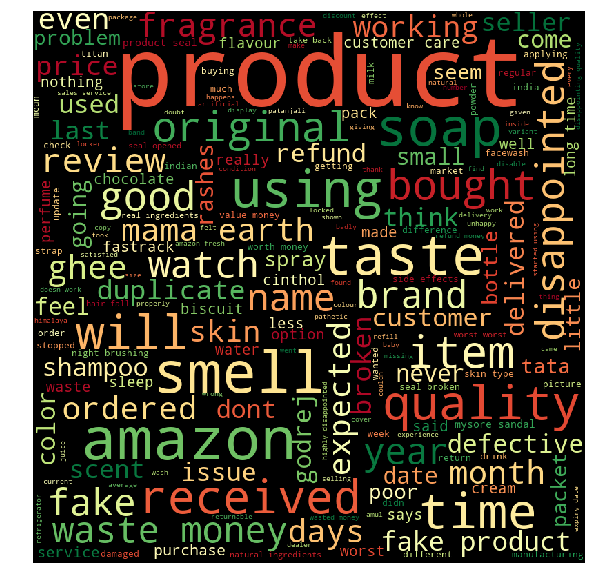

In [27]:
wordcloud = WordCloud(width = 800, height = 800, 
            colormap ='RdYlGn', 
            stopwords = stopwords,max_words = 200,min_word_length = 4, 
            min_font_size = 10).generate(corpus_p) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

We can see that the critical reviews have "fragnance, smell, soap, skin " and more to show that people are negative more for skin and hair care products. Also, the words indicating the issues with these categories of products are "fake, duplicate " etc showing the customer perception about genuine products avaialbility online. 

Further we can have product wise wordcloud for critical reviews for specific imporvements by marketing companies 